In [97]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [98]:
class Hubbard:
    def __init__(self, kbT, mu, Vr, Vd, U):
        # self.K_b = 1
        # self.T = T
        self.kbt = kbT
        self.beta = 1/self.kbt
        self.mu = mu
        self.Vr = Vr
        self.Vd = Vd
        self.U = U
    def S1(self, kx, ky):
        return self.Vr*np.sin(ky) + self.Vd*np.sin(kx)
    def S2(self, kx, ky):
        return self.Vr*np.sin(kx) + self.Vd*np.sin(ky)
    def ek0(self, kx, ky):
        return -2*(np.cos(kx) + np.cos(ky))
    def Ek_plus(self, kx, ky, delta):
        return np.sqrt((self.ek0(kx, ky) - self.mu)**2 + 4*((self.S1(kx, ky))**2 + (self.S2(kx, ky))**2) + (self.U**2)*delta**2 + 4*(self.ek0(kx, ky) - self.mu)*np.sqrt((self.S1(kx, ky))**2 + (self.S2(kx, ky))**2))
    def Ek_minus(self, kx, ky, delta):
        return np.sqrt((self.ek0(kx, ky) - self.mu)**2 + 4*((self.S1(kx, ky))**2 + (self.S2(kx, ky))**2) + self.U**2*delta**2 - 4*(self.ek0(kx, ky) - self.mu)*np.sqrt((self.S1(kx, ky))**2 + (self.S2(kx, ky))**2))
    def ek_plus(self, kx, ky):
      return self.ek0(kx, ky) + 2*np.sqrt(((self.S1(kx, ky)))**2 + (self.S2(kx, ky))**2)
    def ek_minus(self, kx, ky):
      return self.ek0(kx, ky) - 2*np.sqrt(((self.S1(kx, ky)))**2 + (self.S2(kx, ky))**2)

In [99]:
# Energy function for the system, by taking the expectation value with respect to finite temperature thermal state
def energy(delta):
    sum = 0
    N = 16
    for i in range(int(np.sqrt(N))):
        for j in range(int(np.sqrt(N))):
            sum += ((-hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta))/2)*(np.tanh(hub.beta*(hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2)) + ((-hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta))/2)*(np.tanh(hub.beta*(hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2)) + (hub.ek0(np.pi*((i-1)/2), np.pi*((j-1)/2))-hub.mu)/2 + (hub.ek0(np.pi*((i-1)/2), np.pi*((j-1)/2))-hub.mu)/2
    return sum + N*hub.U*delta**2
# gradient function for the energy
def grad(delta):
  sum = 0
  N = 16
  for i in range(int(np.sqrt(N))):
        for j in range(int(np.sqrt(N))):
            sum += -((hub.beta*delta*hub.U**2)/4)*(1/((math.cosh(hub.beta*(hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2))**2) + 1/((math.cosh(hub.beta*(hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2))**2)) - (((delta*hub.U**2)/(2*hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta)))*(np.tanh(hub.beta*(hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2)) + (delta*hub.U**2/(2*hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta)))*(np.tanh(hub.beta*(hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2)))
  return 2*delta*hub.U*N + sum
# function of delta obtained for self consistency
def fdel(delta):
    sum = 0
    N = 16
    for i in range(int(np.sqrt(N))):
        for j in range(int(np.sqrt(N))):
            sum += (1/hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta))*(np.tanh(hub.beta*(hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2)) + (1/hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta))*(np.tanh(hub.beta*(hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2))
    return (hub.U*delta/(4*N))*sum
# function to solve the self consistency
def rootdel(x):
  return fdel(x)-x
def free_energy(delta):
    sum = 0
    N = 16
    for i in range(int(np.sqrt(N))):
        for j in range(int(np.sqrt(N))):
            sum += ((-hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta))/2)*(2/(hub.beta*hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu))*(np.log(np.cosh(hub.beta*(hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2))) + ((-hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta))/2)*(2/(hub.beta*hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu))*(np.log(np.cosh(hub.beta*(hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2))) + (hub.ek0(np.pi*((i-1)/2), np.pi*((j-1)/2))-hub.mu)/2 + (hub.ek0(np.pi*((i-1)/2), np.pi*((j-1)/2))-hub.mu)/2
    return sum + N*hub.U*delta**2
def grad_energy(delta):
    sum = 0
    N = 16
    for i in range(int(np.sqrt(N))):
        for j in range(int(np.sqrt(N))):
            sum += ((hub.mu*(hub.U**2)*delta)/(hub.beta*hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta)*(hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)**2))*(np.log(np.cosh(hub.beta*(hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2))) - (((hub.U**2)*delta)/(2*(hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)))*((np.tanh(hub.beta*(hub.Ek_plus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2))) + ((hub.mu*(hub.U**2)*delta)/(hub.beta*hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta)*(hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)**2))*(np.log(np.cosh(hub.beta*(hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2))) - (((hub.U**2)*delta)/(2*(hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)))*((np.tanh(hub.beta*(hub.Ek_minus(np.pi*((i-1)/2), np.pi*((j-1)/2), delta) - hub.mu)/2))) 
    return sum + N*hub.U*delta*2

In [100]:
# Energy function for the system, by taking the expectation value with respect to finite temperature thermal state
N = 16
RL = np.linspace(1, int(np.sqrt(N)), int(np.sqrt(N)))
def energy(delta):
    sum = 0
    for i in RL:
        for j in RL:
            sum += ((-hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta))/2)*(np.tanh(hub.beta*(hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2)) + ((-hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta))/2)*(np.tanh(hub.beta*(hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2)) + (hub.ek0(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))))-hub.mu)/2 + (hub.ek0(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))))-hub.mu)/2
    return sum + N*hub.U*delta**2
# gradient function for the energy
def grad(delta):
  sum = 0
  for i in RL:
    for j in RL:
        sum += -((hub.beta*delta*hub.U**2)/4)*(1/((math.cosh(hub.beta*(hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2))**2) + 1/((math.cosh(hub.beta*(hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2))**2)) - (((delta*hub.U**2)/(2*hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta)))*(np.tanh(hub.beta*(hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2)) + (delta*hub.U**2/(2*hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta)))*(np.tanh(hub.beta*(hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2)))
  return 2*delta*hub.U*N + sum
# function of delta obtained for self consistency
def fdel(delta):
    sum = 0
    for i in RL:
        for j in RL:
            sum += (1/hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta))*(np.tanh(hub.beta*(hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2)) + (1/hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta))*(np.tanh(hub.beta*(hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2))
    return (hub.U*delta/(4*N))*sum
# function to solve the self consistency
def rootdel(x):
  return fdel(x)-x
def free_energy(delta):
    sum = 0
    for i in RL:
        for j in RL:
            sum += ((-hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta))/2)*(2/(hub.beta*hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu))*(np.log(np.cosh(hub.beta*(hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2))) + ((-hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta))/2)*(2/(hub.beta*hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu))*(np.log(np.cosh(hub.beta*(hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2))) + (hub.ek0(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))))-hub.mu)/2 + (hub.ek0(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))))-hub.mu)/2
    return sum + N*hub.U*delta**2
def grad_energy(delta):
    sum = 0
    for i in RL:
        for j in RL:
            sum += ((hub.mu*(hub.U**2)*delta)/(hub.beta*hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta)*(hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)**2))*(np.log(np.cosh(hub.beta*(hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2))) - (((hub.U**2)*delta)/(2*(hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)))*((np.tanh(hub.beta*(hub.Ek_plus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2))) + ((hub.mu*(hub.U**2)*delta)/(hub.beta*hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta)*(hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)**2))*(np.log(np.cosh(hub.beta*(hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2))) - (((hub.U**2)*delta)/(2*(hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)))*((np.tanh(hub.beta*(hub.Ek_minus(np.pi*((2*i - np.sqrt(N))/(np.sqrt(N))), np.pi*((2*j - np.sqrt(N))/(np.sqrt(N))), delta) - hub.mu)/2))) 
    return sum + N*hub.U*delta*2

In [101]:
# defining numerical methods to find the root
def bisection(f, a, b):
  c = (a+b)/2
  while abs(f(c)) > 0.0000001:
    if f(a)*f(c)<0:
      b = c
    elif f(b)*f(c)<0:
      a = c
    else:
      return "problem"
    c = (a+b)/2
  return c
def fpa(f, d):
  k = 0
  while abs(f(d)-d) > 0.0000001:
      d = f(d)
      k += 1
      if k>100000:
        print("broke")
        return d
  return d
#Optimisation method
def opti(gr, en, b):
  op = b
  arr = []
  a = 0.001
  for i in range(1000):
    # print(energy(d))
    op = op - a*gr(op)
    arr.append(en(op))
  return op

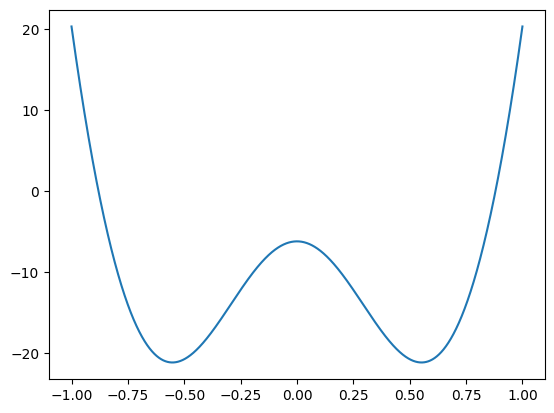

In [40]:
N = 16
hub = Hubbard(5, 0, 0, 0, 15)
x = np.linspace(-1, 1, 10000)
plt.plot(x, energy(x))

Text(0.5, 0, '$\\Delta$')

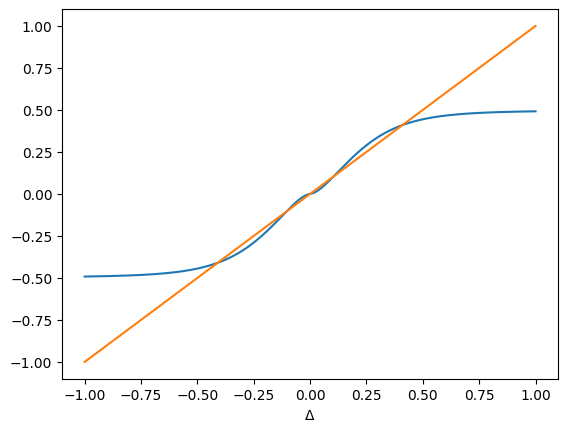

In [96]:
# hub = Hubbard(2, 0, 0.5, 0.5, 20)
hub = Hubbard(2, 1, 0.5, 0.5, 15)
x = np.linspace(-1, 1, 10000)
plt.plot(x, fdel(x))
plt.plot(x, x)
plt.xlabel("$\Delta$")

In [ ]:
t = np.linspace(0.01, 15, 50)
arr_delta = []
for i in t:
  hub = Hubbard(i, 1, 0.5, 0.5, 15)
  arr_delta.append(bisection(rootdel, 2))
plt.plot(t, arr_delta)
plt.xlabel("$K_b$T/t")
plt.ylabel("$\Delta$")

In [107]:
# no spin orbit and no mu, varying U
U = [2, 5, 10, 15, 20, 80, 100]
x = np.linspace(0.01, 100, 100)
delt_noSO = []
s = 1
for j in U:
    del_temp = []
    for i in x:
        hub = Hubbard(i, 0, 0.5, 0.5, j)
        fpa_del = fpa(fdel, 0.5)
        b = bisection(rootdel, 0.001, 0.45)
        if b == "problem":
            a = bisection(rootdel, 0.001, 0.35)
            if a == "problem":
                s = 0
            else:
                bis_del = a
        else:
            bis_del = b
        if s == 0:
            del_temp.append(fpa_del)
        else:    
            if free_energy(fpa_del)<free_energy(bis_del):
                del_temp.append(fpa_del)
            else:
                del_temp.append(bis_del)
    delt_noSO.append(del_temp)

Text(0, 0.5, '$\\Delta$')

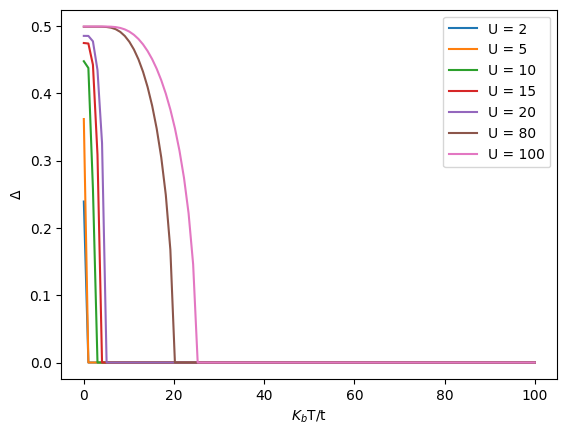

In [108]:
# Delta(T) as a function of U, asymptotically reaches 
plt.plot(x, delt_noSO[0], label = "U = "+str(U[0]))
plt.plot(x, delt_noSO[1], label = "U = "+str(U[1]))
plt.plot(x, delt_noSO[2], label = "U = "+str(U[2]))
plt.plot(x, delt_noSO[3], label = "U = "+str(U[3]))
plt.plot(x, delt_noSO[4], label = "U = "+str(U[4]))
plt.plot(x, delt_noSO[5], label = "U = "+str(U[5]))
plt.plot(x, delt_noSO[6], label = "U = "+str(U[6]))
# plt.plot(x, delt_noSO[7], label = "U = "+str(U[7]))

plt.legend()
plt.xlabel("$K_b$T/t")
plt.ylabel("$\Delta$")

In [89]:
# With spin orbit couplling
U = [2, 5, 10, 15, 20, 100]
x = np.linspace(0.01, 20, 100)
delt_SO = []
s = 1
for j in U:
    del_temp = []
    for i in x:
        hub = Hubbard(i, 0, 0.5, 0.5, j)
        fpa_del = fpa(fdel, 0.5)
        b = bisection(rootdel, 0.001, 0.45)
        if b == "problem":
            a = bisection(rootdel, 0.001, 0.35)
            if a == "problem":
                s = 0
            else:
                bis_del = a
        else:
            bis_del = b
        if s == 0:
            del_temp.append(fpa_del)
        else:    
            if free_energy(fpa_del)<free_energy(bis_del):
                del_temp.append(fpa_del)
            else:
                del_temp.append(bis_del)
    delt_SO.append(del_temp)

Text(0, 0.5, '$\\Delta$')

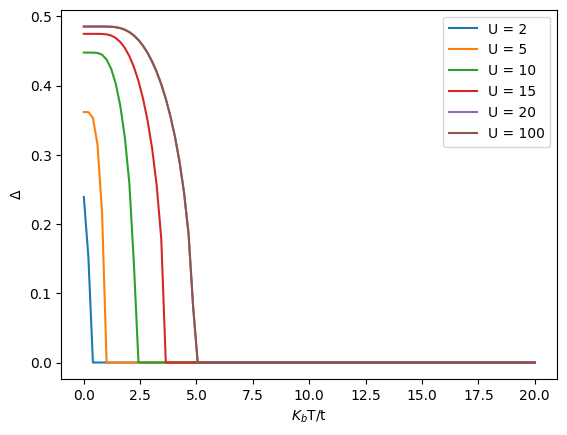

In [90]:
# Delta(T) as a function of U
plt.plot(x, delt_SO[0], label = "U = "+str(U[0]))
plt.plot(x, delt_SO[1], label = "U = "+str(U[1]))
plt.plot(x, delt_SO[2], label = "U = "+str(U[2]))
plt.plot(x, delt_SO[3], label = "U = "+str(U[3]))
plt.plot(x, delt_SO[4], label = "U = "+str(U[4]))
plt.plot(x, delt_SO[4], label = "U = "+str(U[5]))
plt.legend()
plt.xlabel("$K_b$T/t")
plt.ylabel("$\Delta$")

In [74]:
# Varying SO, Vr
SO = [0.2, 0.8, 2, 4, 6, 10]
x = np.linspace(0.01, 20, 100)
delt_Vr = []
s = 1
for j in SO:
    del_temp = []
    for i in x:
        hub = Hubbard(i, 0, j, 0, 10)
        fpa_del = fpa(fdel, 0.5)
        b = bisection(rootdel, 0.001, 0.45)
        if b == "problem":
            a = bisection(rootdel, 0.001, 0.35)
            if a == "problem":
                s = 0
            else:
                bis_del = a
        else:
            bis_del = b
        if s == 0:
            del_temp.append(fpa_del)
        else:    
            if free_energy(fpa_del)<free_energy(bis_del):
                del_temp.append(fpa_del)
            else:
                del_temp.append(bis_del)
    delt_Vr.append(del_temp)

Text(0, 0.5, '$\\Delta$')

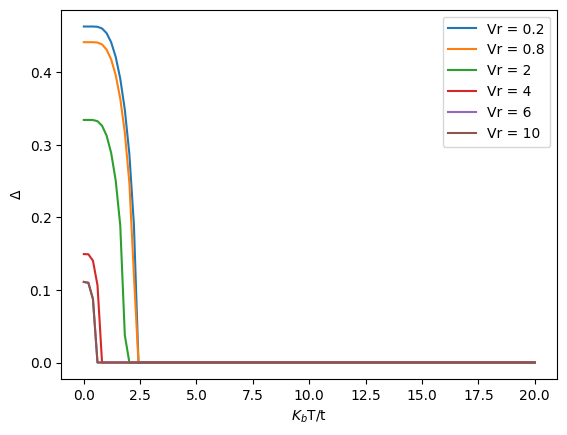

In [87]:
# Delta(T) as a function of U
plt.plot(x, delt_Vr[0], label = "Vr = "+str(SO[0]))
plt.plot(x, delt_Vr[1], label = "Vr = "+str(SO[1]))
plt.plot(x, delt_Vr[2], label = "Vr = "+str(SO[2]))
plt.plot(x, delt_Vr[3], label = "Vr = "+str(SO[3]))
plt.plot(x, delt_Vr[4], label = "Vr = "+str(SO[4]))
plt.plot(x, delt_Vr[4], label = "Vr = "+str(SO[5]))
plt.legend()
plt.xlabel("$K_b$T/t")
plt.ylabel("$\Delta$")

In [76]:
# Varying SO, Vr
SO = [0.2, 0.8, 2, 4, 6, 10]
x = np.linspace(0.01, 20, 100)
delt_Vr = []
s = 1
for j in SO:
    del_temp = []
    for i in x:
        hub = Hubbard(i, 0, 0, j, 10)
        fpa_del = fpa(fdel, 0.5)
        b = bisection(rootdel, 0.001, 0.45)
        if b == "problem":
            a = bisection(rootdel, 0.001, 0.35)
            if a == "problem":
                s = 0
            else:
                bis_del = a
        else:
            bis_del = b
        if s == 0:
            del_temp.append(fpa_del)
        else:    
            if free_energy(fpa_del)<free_energy(bis_del):
                del_temp.append(fpa_del)
            else:
                del_temp.append(bis_del)
    delt_Vr.append(del_temp)

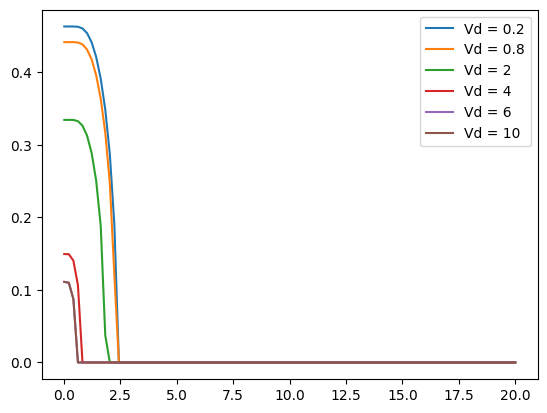

In [77]:
# Delta(T) as a function of U
plt.plot(x, delt_Vr[0], label = "Vd = "+str(SO[0]))
plt.plot(x, delt_Vr[1], label = "Vd = "+str(SO[1]))
plt.plot(x, delt_Vr[2], label = "Vd = "+str(SO[2]))
plt.plot(x, delt_Vr[3], label = "Vd = "+str(SO[3]))
plt.plot(x, delt_Vr[4], label = "Vd = "+str(SO[4]))
plt.plot(x, delt_Vr[4], label = "Vd = "+str(SO[5]))
plt.legend()

In [78]:
t = np.linspace(0.01, 5, 50)
arr_sc = []
for i in t:
  hub = Hubbard(i, 0, 0, 0, 10)
  arr_sc.append(fpa(fdel, 0.5))

In [66]:
# Comparing delta from Self-consistency and free energy
N = 16
t = np.linspace(0.01, 10, 100)
arr_opt = []
for i in t:
  hub = Hubbard(i, 0, 0, 0, 10)
  arr_opt.append(opti(grad, energy, 0.5))

In [79]:
# Comparing delta from Self-consistency and free energy
t = np.linspace(0.01, 5, 50)
arr_opt = []
for i in t:
  hub = Hubbard(i, 0, 0, 0, 10)
  arr_opt.append(opti(grad_energy, free_energy, 0.5))

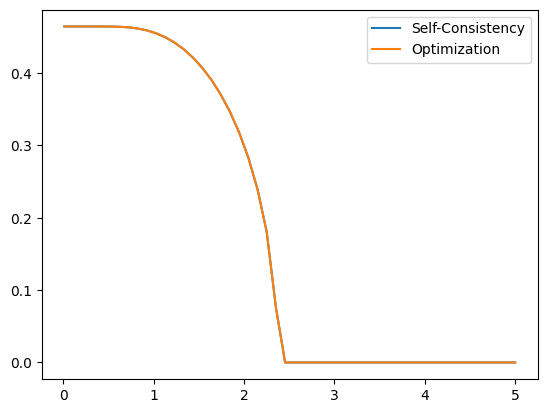

In [80]:
plt.plot(t, arr_sc, label="Self-Consistency")
plt.plot(t, arr_opt, label="Optimization")
plt.legend()